## Curso: Machine Learning e Imágenes en Python 
* Docentes: Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio


### CLASE 5: 
### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	**Histograma. Mejora de la imagen: contraste,** filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.

Archivos necesarios para la notebook: 'daisy.jpg', 'lenna.jpg','pout.png' y 'ortopantomografia2.png'



### Mejora de la Imagen

* Acentuar algunas características de la imagen, por ejemplo: bordes, contraste. Este objetivo implica un grado de juicio subjetivo acerca de la calidad resultante, dependerá de la operación y la aplicación en cuestión.

* La mejora de una imagen no busca agregar información, sino que, por ejemplo, la resalta.

* Un método no es siempre útil para resolver todos los problemas similares. 

* Los resultados pueden producir una imagen diferente a la original, se pueden sacrificar algunos aspectos para mejorar otros, nunca agrega información.

### Métodos de mejora según el dominio:
+ Existen métodos en el Dominio Espacial o en el de Frecuencia, así como en otros dominios. En este curso nos focalizaremos en el dominio espacial.
Considerando una imagen monocromáticas 2D:  

T: imagen f de entrada ------> imagen g de salida            

                      
**Mejora punto a punto (lugar a lugar/ pixel a pixel): **
    
    r=f(i,j) ------> T(r)= g(i,j)
    
            r ----->  T(r)
            
            r= nivel de gris de la imagen original y 
            T(r)= nuevo valor, nivel de gris de la imagen modificada
            


## Importamos las librerías necesarias

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Histograma

### Es una representación de la distribución de los niveles de grises en una imagen.

### Dado un determinado nivel de gris, el histograma muestra la cantidad de píxeles que tienen dicha intensidad.

### Muestra gráficamente el vector de frecuencias de las intensidades presentes en la imagen.

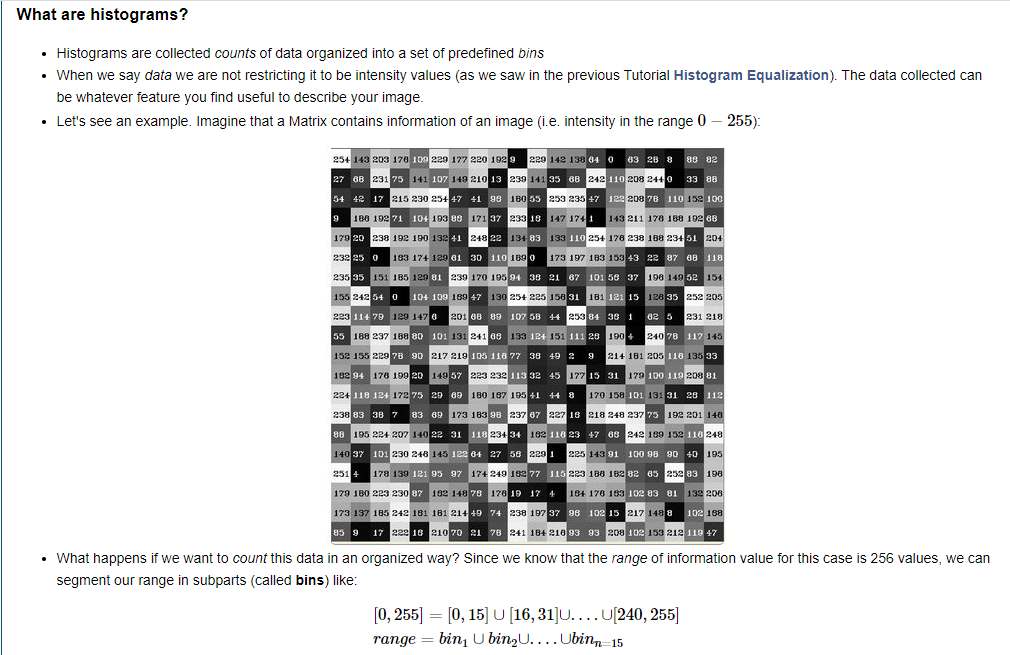

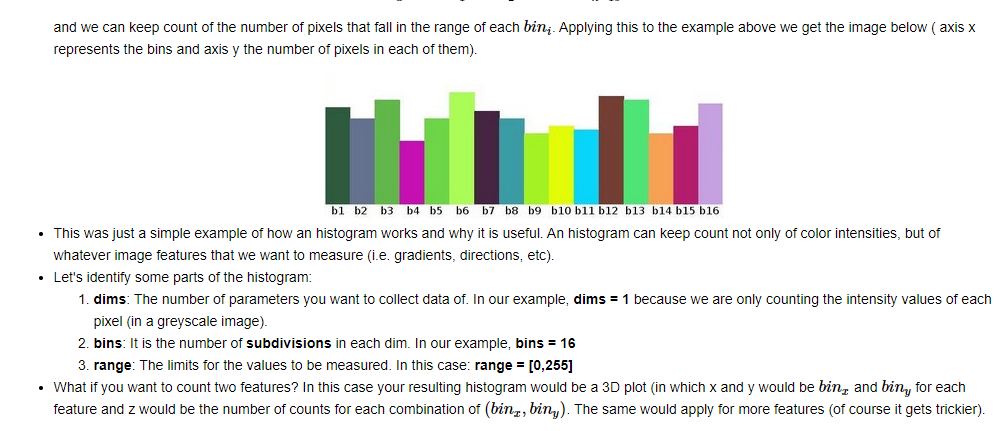


https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

## Ejemplos Histogramas


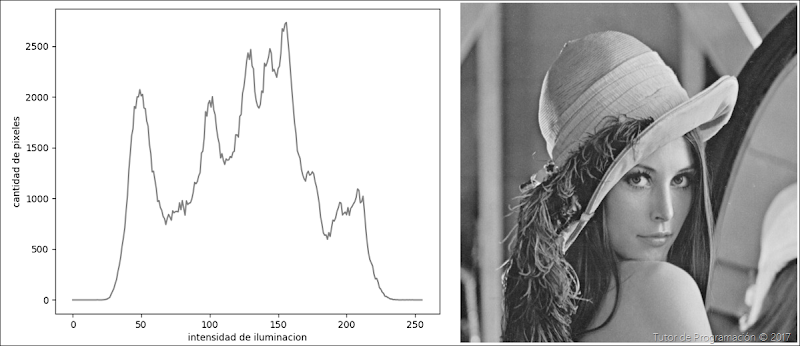

## Observaciones sobre Histogramas


* Cuando el rango es pequeño se trata de imágenes con poco contraste.

* Cuando el rango es grande se trata de imágenes con mucho contraste.

* Cuando el histograma posee altos valores en los extremos de la escala (forma de “U”) la imagen está saturada. 

* Cuando el histograma está corrido hacia la derecha, la imagen es clara

* Cuando el histograma está corrido hacia la izquierda, la imagen es oscura

**Histograma Saturado**
Se pierden detalles de la imagen


Más ejemplos:
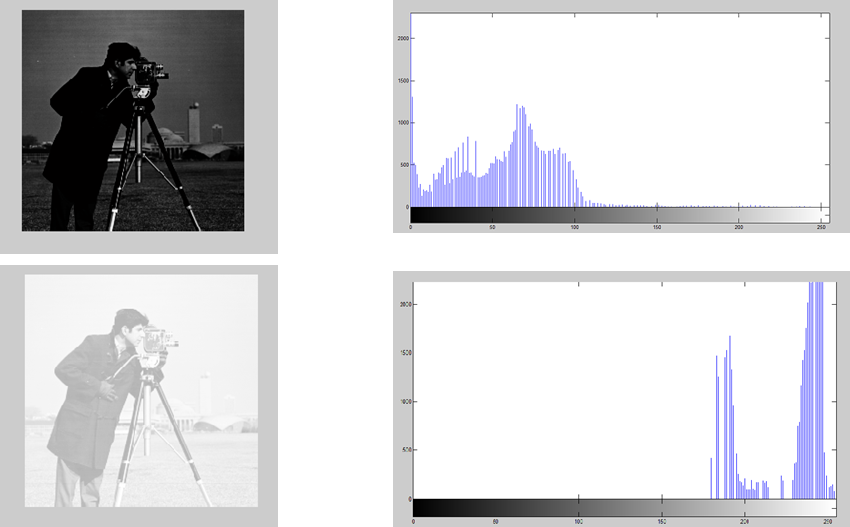

### Bins 
" The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size."

Cita: https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

Las intensidades se pueden agrupar. Por ejemplo, encontrar cuántos píxeles pertenecen a los intervalos de intensidades [0,16) [16,32)...




**Histogramas con Python: librerías numpy, cv2 o matplotlib**

numpy tiene una función para calcular el histograma, calcula el histograma de cualquier tipo de dato, parece que no es rápida

Con Open cv, está pensado para histograma de imágenes (Monocroma o RGB):

**cv2.calcHist([images], channels, mask, histSize, ranges[, hist[, accumulate]])**

- Devuelve un vector 
- El nombre de la imagen debe estar entre corchetes
- Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2. 
- Si la imagen es gris/monocroma se pone 0.
- Si el histograma es de la imagen completa se coloca como máscara None. 
- Se puede pedir el histograma de una parte de la imagen, mediante una máscara. 
- histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
- ranges es el rango. En nuestro caso, normalmente es [0,256]


aqui info sobre los prametros usados: https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


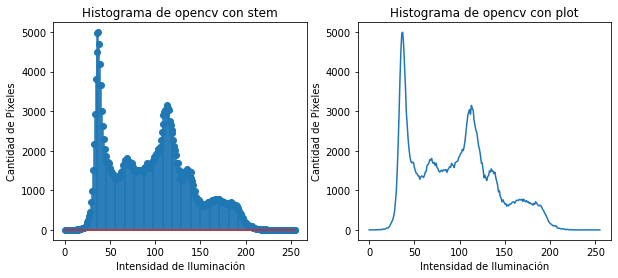

In [ ]:
#Cargo imagen y calculo histograma
img = cv2.imread('lenna.jpg',0) #El 0 indica que devuelve imagen en gris directamente, "una fusion estre los 3 canales"
hist = cv2.calcHist([img],[0],None,[256],[0,256])  #Así hist será un array de 256x1

plt.figure(figsize=(10,4))
plt.subplot(121),plt.stem(hist)  #la funcion "stem" es para datos discretos--plt.subplot(121),range[64:128]p,lt.stem(hist) , asi tenemos conteo entre 64 y 128
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con stem')

plt.subplot(122),plt.plot(hist) #la funcion "plot" une los puntos discretos--plt.subplot(122),range[64:128],plt.plot(hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con plot')

plt.show()

**Opcional:**

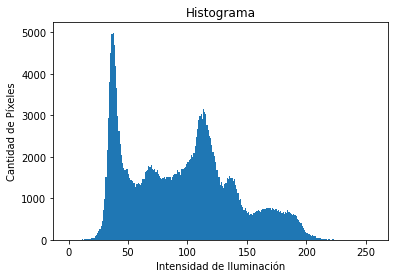

In [ ]:
#El histograma se puede mostrar con matplotlib. No es necesario haberlo creado con openCV
plt.hist(img.ravel(),256,[0,256]) #no lo guarda en un vector, lo genera automáticamente con el ".ravel"
#img.ravel() "estira" img en un vector, es decir concatena las filas de img en un solo vector
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.title("Histograma")
plt.show()

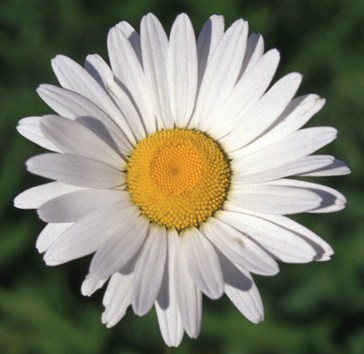

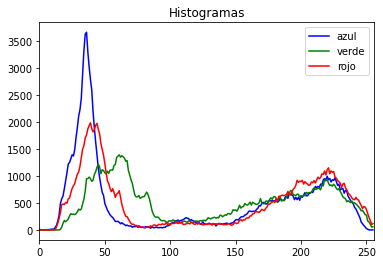

In [ ]:
#Histogramas de R, G y B 
path='daisy.jpg'
img = cv2.imread(path)
cv2_imshow( img)

color = ('b','g','r')
for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['azul','verde','rojo'])
plt.show()

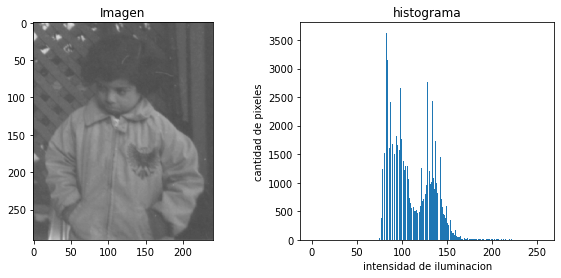

In [ ]:
img = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)

plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(img, cmap='gray',vmin=0 ,vmax=255)
plt.title("Imagen")

#Función hist de matplotlib
#ravel() indica que devuelve un array 1-D
plt.subplot(122),plt.hist(img[:,:].ravel(), 256,[0,256] ) 
plt.title('histograma')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')

#sin límites hace autoescalado de los ejes

plt.show()


**Ejercicio:**
Qué conclusión sobre la imagen extrae del histograma?



In [ ]:
print(np.min(img),np.max(img))  #analizamos el rango para ver que tienen poco contraste la imagen, se complementa con el histo

74 224


CONCLUSION: vemos que tiene un rango acotado o pequeño de intensidades, eso me indica que tien poco contraste

Repita el procedimiento para la imagen ortopantomografia2.png

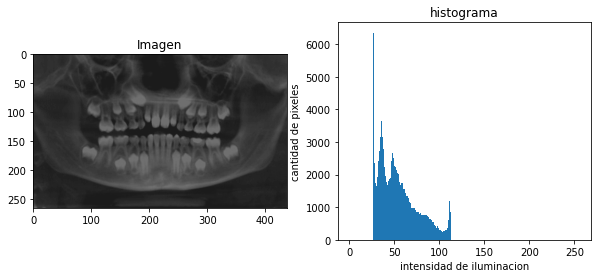

In [ ]:
imge = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)

plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(imge, cmap='gray',vmin=0 ,vmax=255)
plt.title("Imagen")

#Función hist de matplotlib
#ravel() indica que devuelve un array 1-D
plt.subplot(122),plt.hist(imge[:,:].ravel(), 256,[0,256] ) 
plt.title('histograma')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')


plt.show()

## Histograma con máscara

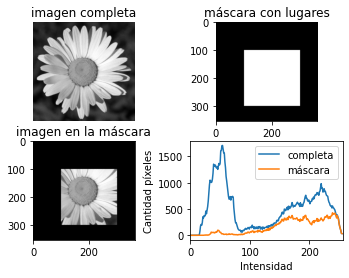

In [ ]:
#Se puede estudiar el histograma de una parte de la imagen
img = cv2.imread('daisy.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:300] = 255
#mask=(img>150) hacer una imagen de booleanos para que la máscara tenga la forma de la flor
masked_img=cv2.bitwise_and(img,mask)
#masked_img = cv2.bitwise_and(img,img,mask = mask)#Argumentos: fuente, máscara
#bitwise_and operación and bit a bit y guarda el resultado

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])


plt.subplot(221), plt.imshow(img, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(222), plt.imshow(mask,'gray'),plt.title('máscara con lugares')
plt.subplot(223), plt.imshow(masked_img, 'gray'), plt.title('imagen en la máscara')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['completa', 'máscara'])
plt.xlim([0,256])

plt.show()

# Operaciones punto a punto

Modificar la intensidad de cada pixel
 
- Si $r$ es la intensidad original del pixel ($r=I(i,j)$) 

- $T(r)$ será la intensidad del pixel en la imagen resultante (imagen trasformada $J(i,j)=T(r)$)
- Se transforma cada pixel, a todos (y cada uno) con la misma transformación


Esto es útil para hacer Mejora de la imagen

## Opciones para mejorar el contraste y la visualización?
+ Modificar el rango
+ Aclarar
+ Oscurecer
+ Ecualizar del histograma
+ etc.

## Modificar el rango 
##(o sea el intervalo de los valores de intensidades)

- llevarlo a [0 - 1]
$$ r \rightarrow T(r)=\frac{r-min}{max-min}$$

- llevarlo a [0 - 255]
para uint8 
$$ r \rightarrow T(r)=\left\lfloor 255\frac{r-min}{max-min} \right\rfloor, \,\, \leftarrow \, floor, redondeo$$

- disminuir el rango

$$ r \rightarrow $T(r)=c \log{(r+1)},\ r\geq 0 , \ c<1$$





### Oscurecer una imagen (a mano)

**Ejemplo: oscurecer asignando a cada valor de intensidad**
$$ r \rightarrow T(r)=r/2$$

La matriz correspondiente a la imagen es de dimensión  (354, 364) 
Cada elemento es de tipo <class 'numpy.uint8'>

valor del pixel (0,0):  38
valor del pixel (70,70):  201



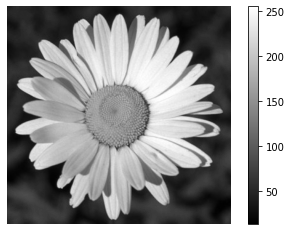

In [4]:
path="daisy.jpg" # si el archivo esta en la misma carpeta que la notebook asi anda bien, sino copio el path entero del archivo
f=cv2.imread(path,0)# Se crea una imagen monocroma del archivo, por ello le pongo el 0

print("La matriz correspondiente a la imagen es de dimensión ",f.shape,
      "\nCada elemento es de tipo", type(f[0,0]))
print()

print('valor del pixel (0,0): ' , f[0,0])
print('valor del pixel (70,70): ' , f[70,70])
print()

plt.imshow(f,cmap="gray")
plt.axis('off')#para quitar la numeración de filas y columnas
plt.colorbar() #para la barra con la referencia de color
plt.show()

In [5]:
#Oscurecer la imagen que está en memoria

g=f/2 #T(r)=r/2 Oscurece la imagen, divido todas las intencidades de la matriz a la mitad
#g=g.astype('uint8') #para forzarlo a unit8 en caso de que sea necesario
print("Intensidad Píxel (0,0) original: ",f[0,0],"Su tipo de dato es", f.dtype) #por necesidad cambia el tipod e dato a float
print("Intensidad Píxel (0,0) luego del oscurecimiento: ",g[0,0],"Su tipo de dato es", g.dtype)
print()

print()
print('Máximo de la imagen original= ',f.max())
print()
print('Máximo de la imagen oscurecida= ',g.max())

Intensidad Píxel (0,0) original:  38 Su tipo de dato es uint8
Intensidad Píxel (0,0) luego del oscurecimiento:  19.0 Su tipo de dato es float64


Máximo de la imagen original=  255

Máximo de la imagen oscurecida=  127.5


### Visualización

QUE PASÓ?



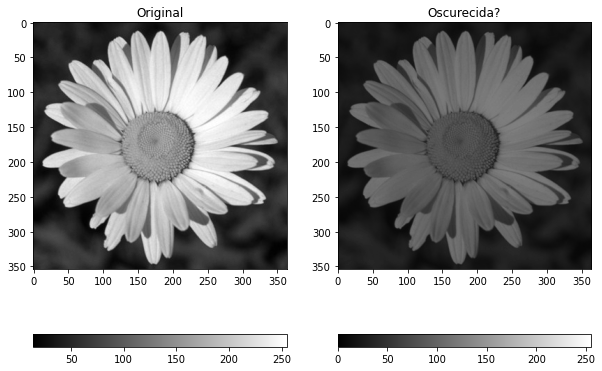

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(f,cmap='gray')
plt.colorbar(orientation='horizontal'), plt.title('Original')
plt.subplot(122),plt.imshow(g,cmap='gray',vmin=0, vmax=255) # si no forzamos acá poniendo valores maximos y minimos NO la oscurece a la imagen 
plt.colorbar(orientation='horizontal'), plt.title('Oscurecida?') #no la oscurece porque solo representa el nuevo rango y hace 0=negro y 127.5= blanco
print('QUE PASÓ?')
print()

CONCLUSION: vemos que los valores maximos son menores, por lo tanto tiene menos brillo o menor intensidad de blancos, ya que es monocroma. Se disminuye el contraste. Simpre tengo que representarlas en la misma escala

**Ejercicio:
cómo la aclararía?**

Intensidad Píxel (0,0) original:  38 Su tipo de dato es uint8
Intensidad Píxel (0,0) luego del aclarado:  1.4387268865499157 Su tipo de dato es float64


Máximo de la imagen original=  255

Máximo de la imagen oscurecida=  1.7404198104793394

QUE PASÓ?


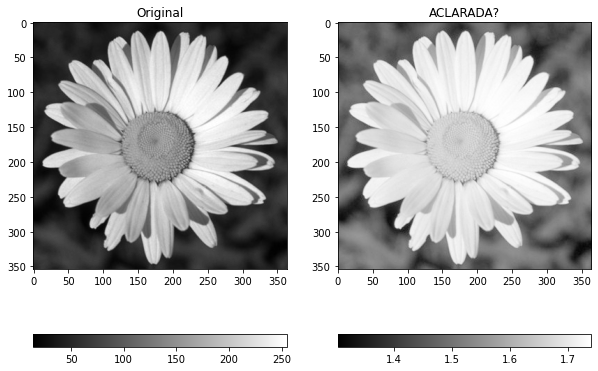

In [7]:
h=f**0.1
print("Intensidad Píxel (0,0) original: ",f[0,0],"Su tipo de dato es", f.dtype)
print("Intensidad Píxel (0,0) luego del aclarado: ",h[0,0],"Su tipo de dato es", g.dtype)
print()

print()
print('Máximo de la imagen original= ',f.max())
print()
print('Máximo de la imagen oscurecida= ',h.max())
print()

plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(f,cmap='gray')
plt.colorbar(orientation='horizontal'), plt.title('Original')
plt.subplot(122),plt.imshow(h,cmap='gray')#,vmin=0, vmax=255)
plt.colorbar(orientation='horizontal'), plt.title('ACLARADA?')
print('QUE PASÓ?')

CONCLUSION: en este caso si multiplico por 2 toda la matriz, duplica el valor de los minimos pero nunca se pasa del 255 que es el valor máximos de uint8, entonces lo homogeinizo con potencias.
 Sino cuando supera el max de 255 "vuelve a empezar el rango"

## Ajuste gamma (sin modificar el rango)
**Condición Importante**: vale para el rango de intensidades $ 0\leq r \leq 1$:

$$T(r)=r^{\gamma},$$

$\,\gamma $ parámetro (fijo y positivo) de la función

### Para Aclarar

$$T(r)=r^{\gamma},\,\gamma <1$$

Por ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$

### Para Oscurecer 

$$T(r)=r^{\gamma},\,\gamma >1$$

Por ejemplo $T(r)=r^{2}$

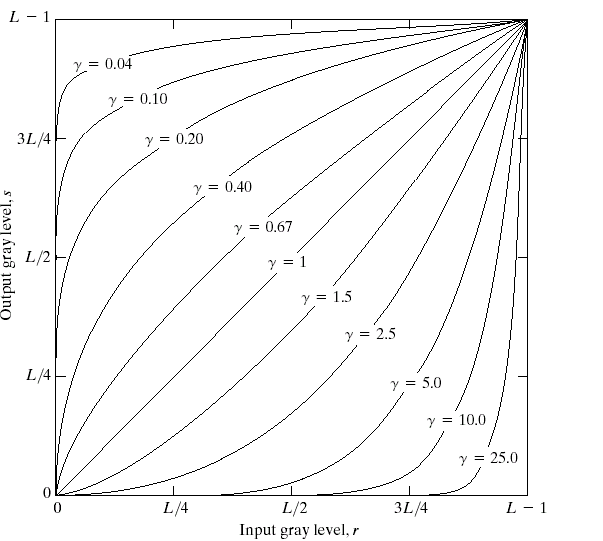

Qué valor de gamma usaría para mejorar la siguiente imagen (mayor o menor que 1?)

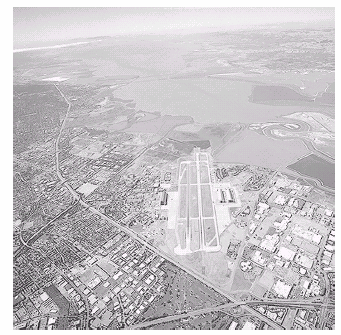

Usaria un gamma mayor a 1 para oscurecerla un poco

### Función para Ajuste gamma adaptada

$T(r)=r^{\gamma}$ para $0\leq r \leq 1 $ 

$T(r)=\left\lfloor 255\left(\frac{r}{255}\right)^{\gamma}\right\rfloor$ para $0\leq r \leq 255 $ (uint8) 

$\gamma $ parámetro (fijo y positivo) de la función

* Para Aclarar: $\gamma <1$ (ejemplo $T(r)=r^{\frac{1}{2}}=\sqrt{r}$)

* Para Oscurecer $\gamma >1$ (ejemplo $T(r)=r^{2}$)

#### Definimos una función de Ajuste gamma  para imágenes uint8

In [10]:
def ajuste_gamma(imagen,gamma):
    #función que dada una imagen (arreglo de tipo uint8), y un valor positivo gamma
    #devuelve otra del mismo tipo pero con ajute gamma, si gamma>1, más oscura y si gamma <1 más clara.....TIENE QUE SER UINT8
    imagenresultado=255*((imagen/255)**gamma)
    imagenresultado=imagenresultado.astype('uint8')
    return imagenresultado

In [11]:
#Para llamar a esta función se le "pasa" la imagen y el valor de gama.
#Por ejemplo
img=f
clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

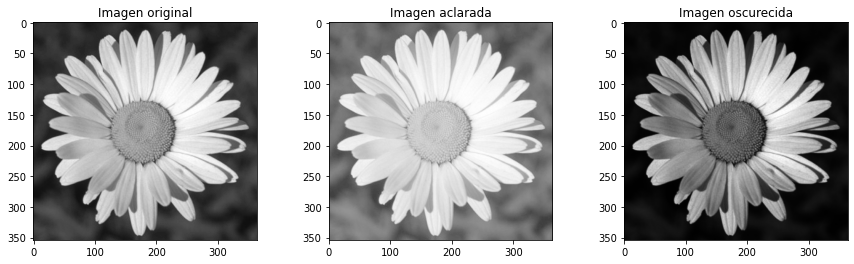

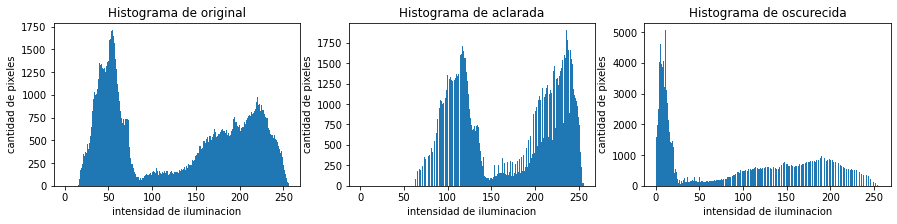

In [12]:
#Para graficar ambas imágenes

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(3)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()


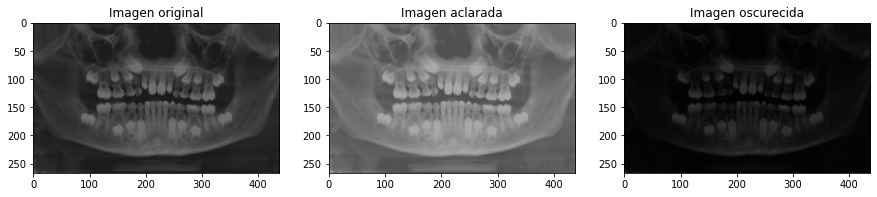

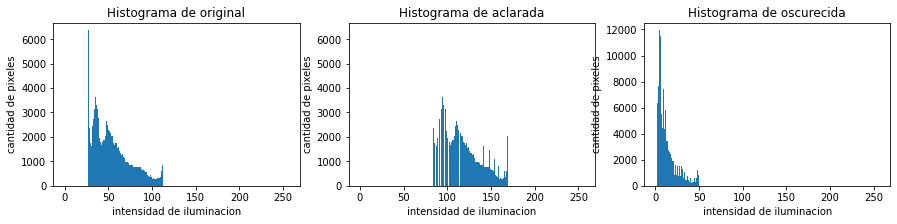

In [15]:
#Programa completo 
#Usa la función definida más arriba

img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#guarda la imagen en grises (monocroma 2D)
clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(3)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()


HACEMOS EL MISMO EJERCICIO PERO ACOTANDO EL RANGO DE LA ORIGINAL DE 0 a 255 uint8

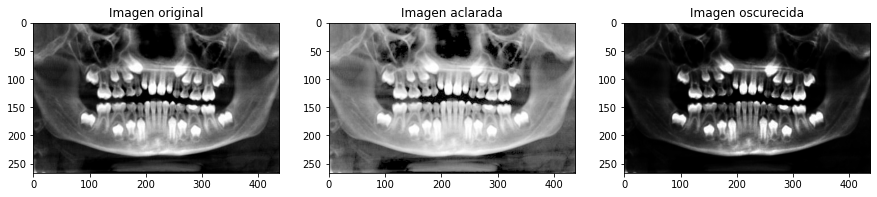

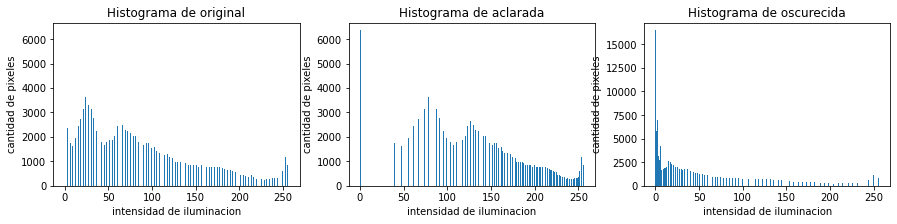

In [19]:

img2 = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE)#la ponemos en otro archivo para no sobre escribir

minn=img2.min()
maxx=img2.max()

img=(img2-minn)/(maxx-minn)*255
img=img.astype("uint8") #FORZAMOS EL DATO A UINT8

clara=ajuste_gamma(img,0.5)
oscura=ajuste_gamma(img,2)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].imshow(clara, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen aclarada')
axs[2].imshow(oscura, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen oscurecida')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(3)
fig.set_figwidth(15)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de original')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(clara[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de aclarada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].hist(oscura[:,:].ravel(), 256,[0,256] ) 
axs[2].set_title('Histograma de oscurecida')
axs[2].set_xlabel('intensidad de iluminacion')
axs[2].set_ylabel('cantidad de pixeles')
plt.show()

**Ejercicio: Buscar en la web si ya hay alguna función en python que la realice el ajuste Gamma, en que librería? implementarla si es posible**

https://programmerclick.com/article/75561056796/

https://scikit-image.org/



## Ecualización del histograma
La ecualización del histograma pretende una distribución uniforme de las intensidades. Esto mejora el contraste.

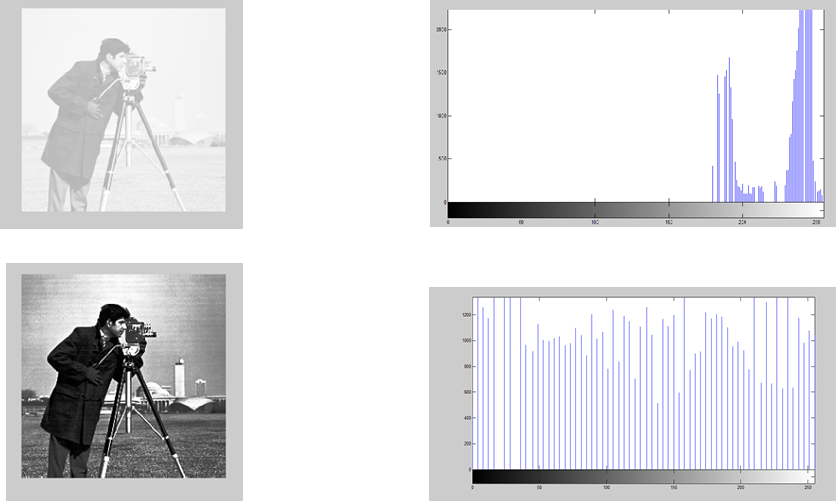

#### Pasos para ecualizar un histograma
1- Se calcula la frecuencia de cada intensidad r como $n_i/n$. $n_i=$ Número de píxeles con esa intensidad. $n=$Número total de píxeles.

2- Se acumulan dichos valores. O sea que a cada intensidad le corresponden las frecuencias acumuladas hasta ese valor. 

3- Se multiplican los valores acumulados por L-1, siendo L la máxima intensidad. Por ejemplo L-1=255
Se redondean los valores al entero más próximo (función floor o piso) 

4- Cada valor de intensidad r se reemplaza por el nuevo valor obtenido s. 


- Para uint8 [0-255] se calcula:
$$s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$$

- Para llevarlo a [0 -1]:

$$s=T(r)=\sum_{i=1}^{r}{\frac{n_i}{n}},$$

en ambas ecuaciones: $n_i=\#$ pixeles con intensidad $i$ y $n=MN=\#$ de pixeles de la imagen  

![image.png](attachment:image.png)


#### Ecualizar imagen ortopantomografía2.png

* Ecualización del histograma: $s=T(r)=\left\lfloor 255*\sum_{i=1}^{r}{\frac{n_i}{n}}\right\rfloor,$ para uint8  ($\left\lfloor \,\right\rfloor$ notación de piso/floor, redondeo entero)

En openCV: **cv2.equalizeHist**


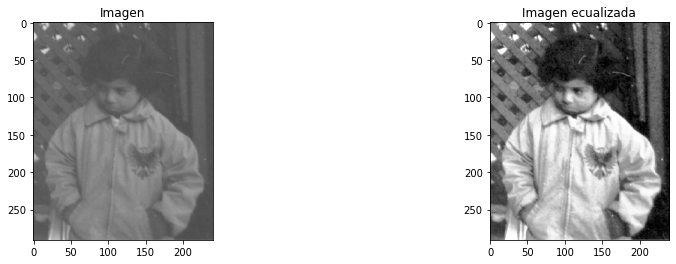

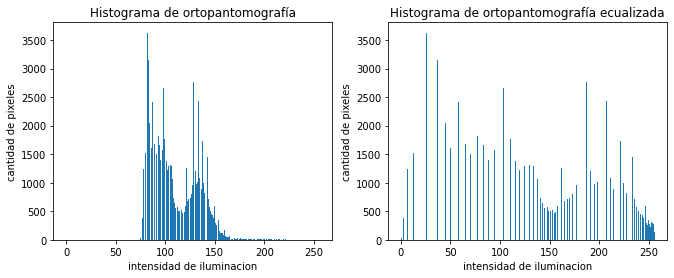

In [25]:
#continuación  la operacion de ecualizacion del histograma se hace en todas las bandas, por mas que sea monocroma la imagen
img = cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(img)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen ecualizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(11)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de ortopantomografía')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de ortopantomografía ecualizada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 
plt.show()


#https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

**Para pensar: El proceso de equalización será reversible?, el ajuste Gamma?**
Se debe considerar si la funcion matematica es reversible y si hay o no perdidas de datos luego de aplicar dicha funcion... esto pasa para la ecualizacion y para el ajuste gamma

**Ejercicio: elegir dos imágenes con bajo contraste y modificarla ecualizando su histograma**

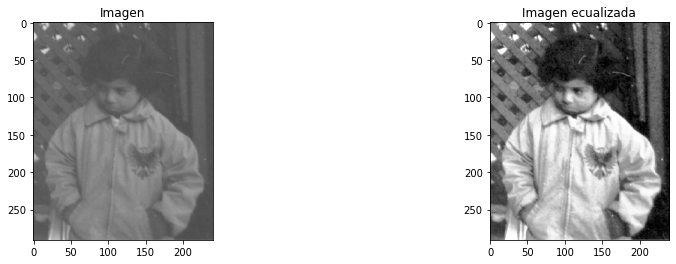

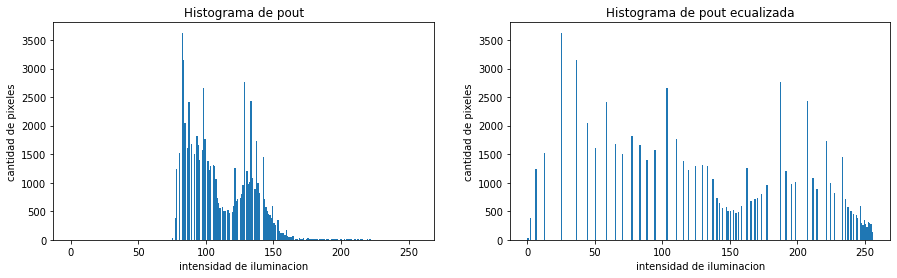

In [26]:

im=cv2.imread('pout.png', cv2.IMREAD_GRAYSCALE)
img_equalizada = cv2.equalizeHist(im)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(im, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_equalizada, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Imagen ecualizada')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].hist(im[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de pout')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_equalizada[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de pout ecualizada')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 
plt.show()

## Negativo de una Imagen
* $T(r)=255-r$, para unint8
* $T(r)=1-r$, para $0\leq r\leq 1$


Básicamente lo que hacemos es invertir el dato o la posicion del mismo en la escala, si vale 0 ahora vale 255 y visceversa. Si es UINT8 y la otra formula para escala 0-1

**Ejercicio**

Calcular el negativo de una imagen y su histograma, y a éste compararlo con el histograma original. Guardar la imagen obtenida 

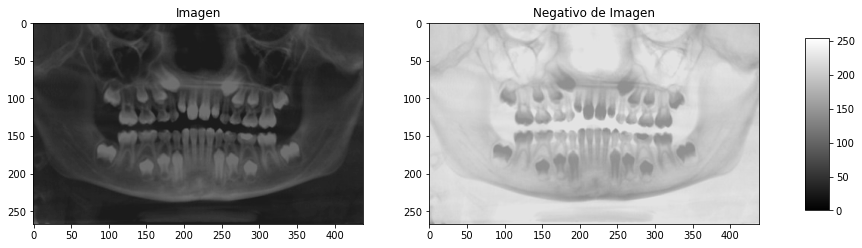

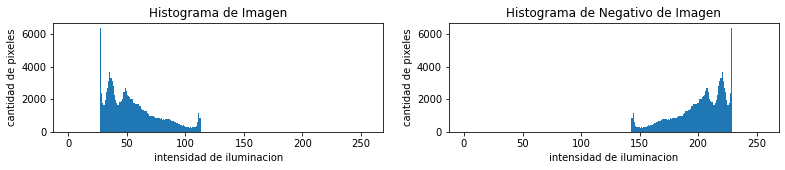

In [27]:
img = cv2.imread('ortopantomografia2.png', cv2.IMREAD_GRAYSCALE) #guarda la imagen en grises (monocroma 2D)
img_negativo=255-img

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(13)
im=axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(img_negativo, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Negativo de Imagen')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.2, 0.025, 0.6])
fig.colorbar(im, cax=cbar_ax)

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(2)
fig.set_figwidth(13)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_negativo[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Negativo de Imagen')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 

plt.show()

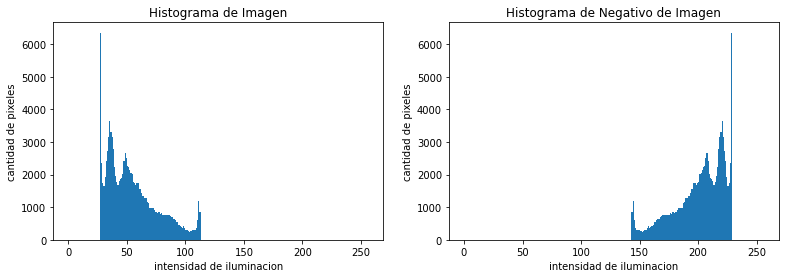

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(13)
axs[0].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(img_negativo[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Negativo de Imagen')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 

plt.show()

**Ejercicio: Calcule el histograma de la componente roja de una imagen a elección (puede ser la flor 'daysy,jpg'), luego calcule el negativo de la componente roja y su histograma correspondiente, y a éste compararlo con el histograma original.**

#### Reducción de de resolución radiométrica  
Reducción de 256 Niveles de Gris a n Niveles de Gris.


#### Ejemplo a mano de reducción de  256 a n=5 niveles de gris

In [30]:
#De 256 a 5 niveles de gris, hace lo mismo pero estratificamos los intervalos del uint8, perdemos resolucion
img = cv2.imread('lenna.jpg',0)#

filas=img.shape[0]
columnas=img.shape[1]

res1=np.zeros((filas,columnas))
res1=np.uint8(res1)
print(res1.shape)
img2=img.copy()
for i in range(filas):
    for j in range(columnas):
        if ((img2[i,j])<50): res1[i,j]=25
        elif((img2[i,j]<100)):res1[i,j]=75
        elif ((img2[i,j]<150)):res1[i,j]=125
        elif((img2[i,j]<200)):res1[i,j]=175
        else: res1[i,j]=225
        
print('zoom 256 niveles:',img[104:109,104:109])
print('zoom 5 niveles:',res1[104:109,104:109])
cv2.imwrite('nueva5.jpg',res1,[cv2.IMWRITE_JPEG_QUALITY, 60]) #compresión JPEG

(512, 512)
zoom 256 niveles: [[ 93  91  94  97  91]
 [111  99  89  85  82]
 [110 100  92  92  91]
 [101  98  97  99  97]
 [101 101  98  93  89]]
zoom 5 niveles: [[ 75  75  75  75  75]
 [125  75  75  75  75]
 [125 125  75  75  75]
 [125  75  75  75  75]
 [125 125  75  75  75]]


True

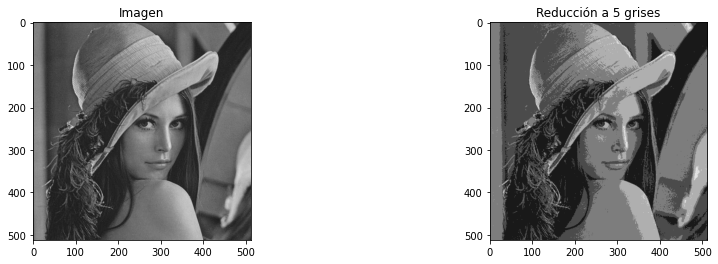

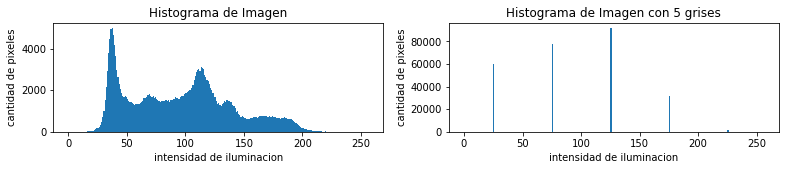

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img2, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen')
axs[1].imshow(res1, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Reducción a 5 grises')
plt.show()
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(2)
fig.set_figwidth(13)
axs[0].hist(img2[:,:].ravel(), 256,[0,256] ) 
axs[0].set_title('Histograma de Imagen')
axs[0].set_xlabel('intensidad de iluminacion')
axs[0].set_ylabel('cantidad de pixeles')
axs[1].hist(res1[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma de Imagen con 5 grises')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles') 

plt.show()


**Ejercicio plus: Definir una función con dos parámetros de entrada, una imagen monocroma uint8 y un número entero n (entre 2 y 128) y cómo resultado devuelva la imagen con k niveles de gris. Implementarla con n=8 y mostrar el resultado. (ayuda: evitar usar el if, y el for de ser posible)**